## Predicting Children's Food Allergies

####  Dara Estrada

## Business Problem & Understanding

Can we predict a child's future food allergies based on their current ones?

The prevalence of food allergies in children has increased at a rapid rate within the past couple of decades. "Between 1997 and 2011, food allergies among children increased 50% and now affect 6 million US children" [1]:[source](https://community.kidswithfoodallergies.org/blog/10-shareable-images-for-food-allergy-awareness-week-1). As a millenial born in 1991, my elementary school experience was void of strict protocols on outside food, unlike the current school landscape. Classmates often had cupcakes or pizza brought in to celebrate birthdays and peanut butter crackers were the unofficial snack of field trips.

The stakeholder is Food Allergy Research & Education (FARE). The objective is to use existing data to predict and model patients' future food allergies. The ability to predict an increase of a specific food allergy identifies new trends and allows research to pivot and address them.



## Data Understanding

The dataset was obtained from [zenodo.org](https://zenodo.org/record/44529#.YmAFlZPMIiz). It entails information on food allergies alongside preexisting conditions on a peer reviewd study from the Children's Hospital of Philadelphia of patients born in 1983-2012. 
There were 333,200 individuals in the dataset. The columns were then pared down as listed below.

## Data Preparation

In [23]:
# import neccessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, make_scorer, recall_score, plot_roc_curve, classification_report, plot_confusion_matrix, confusion_matrix, precision_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import re
from imblearn.over_sampling import SMOTE

In [2]:
# read in csv
df = pd.read_csv('food-allergy-analysis-Zenodo.csv')
df

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.736482,7.449692,NaN,...,NaN,0.736482,NaN,NaN,NaN,5.426420,7.449692,NaN,NaN,NaN
333196,333197,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,True,0.019165,6.984257,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,333198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.443532,7.405886,NaN,...,NaN,NaN,NaN,NaN,NaN,2.321697,NaN,2.321697,6.650240,4.0
333198,333199,2006,S0 - Male,R3 - Other,E0 - Non-Hispanic,P0 - Non-Medicaid,True,0.013689,7.017112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333200 entries, 0 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SUBJECT_ID               333200 non-null  int64  
 1   BIRTH_YEAR               333200 non-null  int64  
 2   GENDER_FACTOR            333200 non-null  object 
 3   RACE_FACTOR              333200 non-null  object 
 4   ETHNICITY_FACTOR         333200 non-null  object 
 5   PAYER_FACTOR             333200 non-null  object 
 6   ATOPIC_MARCH_COHORT      333200 non-null  bool   
 7   AGE_START_YEARS          333200 non-null  float64
 8   AGE_END_YEARS            333200 non-null  float64
 9   SHELLFISH_ALG_START      5246 non-null    float64
 10  SHELLFISH_ALG_END        1051 non-null    float64
 11  FISH_ALG_START           1796 non-null    float64
 12  FISH_ALG_END             527 non-null     float64
 13  MILK_ALG_START           7289 non-null    float64
 14  MILK

In [4]:
df.describe()

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


The patients insurance status, the start allergy date and a column with only one value were all dropped.
Nan values are filled with 0. 
```GENDER_FACTOR, RACE_FACTOR, ETHNICITY_FACTOR``` were parsed out to binomials. 
Target variable was set from the sum of the allergy only columns. The specific level of food allergy severity is not being considered in this analysis.
If a patient was in a march cohort was also dropped.
New datasets for separating out pre-existing conditions from food allergies are created and start values are also dropped.

In [5]:
# Drop payer_factor & treenut 
df = df.drop(['PAYER_FACTOR','TREENUT_ALG_START','TREENUT_ALG_END','ATOPIC_MARCH_COHORT'], axis=1)

In [6]:
#replacing nans
df = df.fillna(0)

In [7]:
# parsing out GENDER_FACTOR, RACE_FACTOR, ETHNICITY_FACTOR
df_GenRaceEth = df.loc[:,'GENDER_FACTOR':'ETHNICITY_FACTOR']

df['GENDER_FACTOR'] = df_GenRaceEth['GENDER_FACTOR'].apply(lambda x: x.replace('S','').replace('- Male','').replace('- Female',''))
df['RACE_FACTOR'] = df_GenRaceEth['RACE_FACTOR'].apply(lambda x: x.replace('R','').replace('- White','').replace('- Black','').replace('- Unknown','').replace('- Asian or Pacific Islander','').replace('- Other',''))
df['ETHNICITY_FACTOR'] = df_GenRaceEth['ETHNICITY_FACTOR'].apply(lambda x: x.replace('E','').replace('- Non-Hispanic','').replace('- Hispanic',''))
df

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,1,1,0,0.093087,3.164956,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,2,1994,1,0,0,12.232717,18.880219,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.262834,18.880219,2.0
2,3,2006,0,0,1,0.010951,6.726899,0.0,0.0,0.0,...,0.0,4.884326,0.000000,3.917864,6.157426,5.127995,0.000000,1.404517,6.157426,4.0
3,4,2004,0,4,1,2.398357,9.111567,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,5,2006,1,1,0,0.013689,6.193018,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,333196,2006,0,0,0,0.736482,7.449692,0.0,0.0,0.0,...,0.0,0.736482,0.000000,0.000000,0.000000,5.426420,7.449692,0.000000,0.000000,0.0
333196,333197,2006,1,1,0,0.019165,6.984257,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
333197,333198,2006,0,0,0,0.443532,7.405886,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,2.321697,0.000000,2.321697,6.650240,4.0
333198,333199,2006,0,3,0,0.013689,7.017112,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [8]:
# allergy only sublist
df_ALG = df.loc[:,'SHELLFISH_ALG_START':'CASHEW_ALG_END']
df_ALG

,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,SOY_ALG_START,SOY_ALG_END,EGG_ALG_START,EGG_ALG_END,...,PISTACH_ALG_START,PISTACH_ALG_END,ALMOND_ALG_START,ALMOND_ALG_END,BRAZIL_ALG_START,BRAZIL_ALG_END,HAZELNUT_ALG_START,HAZELNUT_ALG_END,CASHEW_ALG_START,CASHEW_ALG_END
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.002053,1.002053,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333196,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333197,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333198,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# dropping starts
df.columns.str.endswith('START')
df = df.loc[:,~df.columns.str.endswith('START')]

In [10]:
# dropping firsts
df.columns.str.startswith('FIRST')
df = df.loc[:,~df.columns.str.startswith('FIRST')]

In [11]:
# creating allergy only subset and setting target
# adding df_ALF to main df
df['ALG_TOTAL'] = df_ALG.sum(axis=1)

# zero = no allergy | greater than zero = Allergy
df['ALG_target'] = ['Allergy' if x > 0 else 'No_Allergy' for x in df['ALG_TOTAL']]

# turning it into a boolean
df['ALG_target'] = [0 if x > 0 else 1 for x in df['ALG_TOTAL']]

In [12]:
df['ALG_target'].value_counts()

1    310602
0     22598
Name: ALG_target, dtype: int64

Exploring the dataset.

0     169032
1     164168
Name: GENDER_FACTOR, dtype: int64

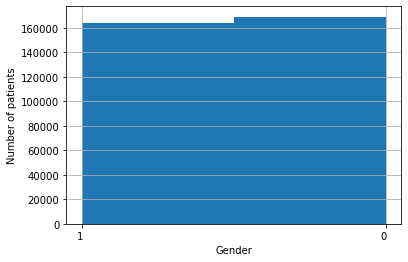

In [13]:
# amount of male and female
df['GENDER_FACTOR'].hist(bins=2)
plt.xlabel('Gender')
plt.ylabel('Number of patients');
df['GENDER_FACTOR'].value_counts()   

0     183308
1      97795
4      40940
2       9152
3       2005
Name: RACE_FACTOR, dtype: int64

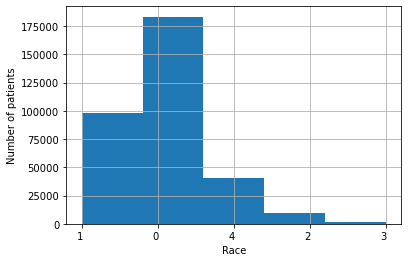

In [14]:
# amount of each race
df['RACE_FACTOR'].hist(bins=5)
plt.xlabel('Race')
plt.ylabel('Number of patients');
df['RACE_FACTOR'].value_counts()
# 0- White, 1- Black, 3- Other, 4- Unknown

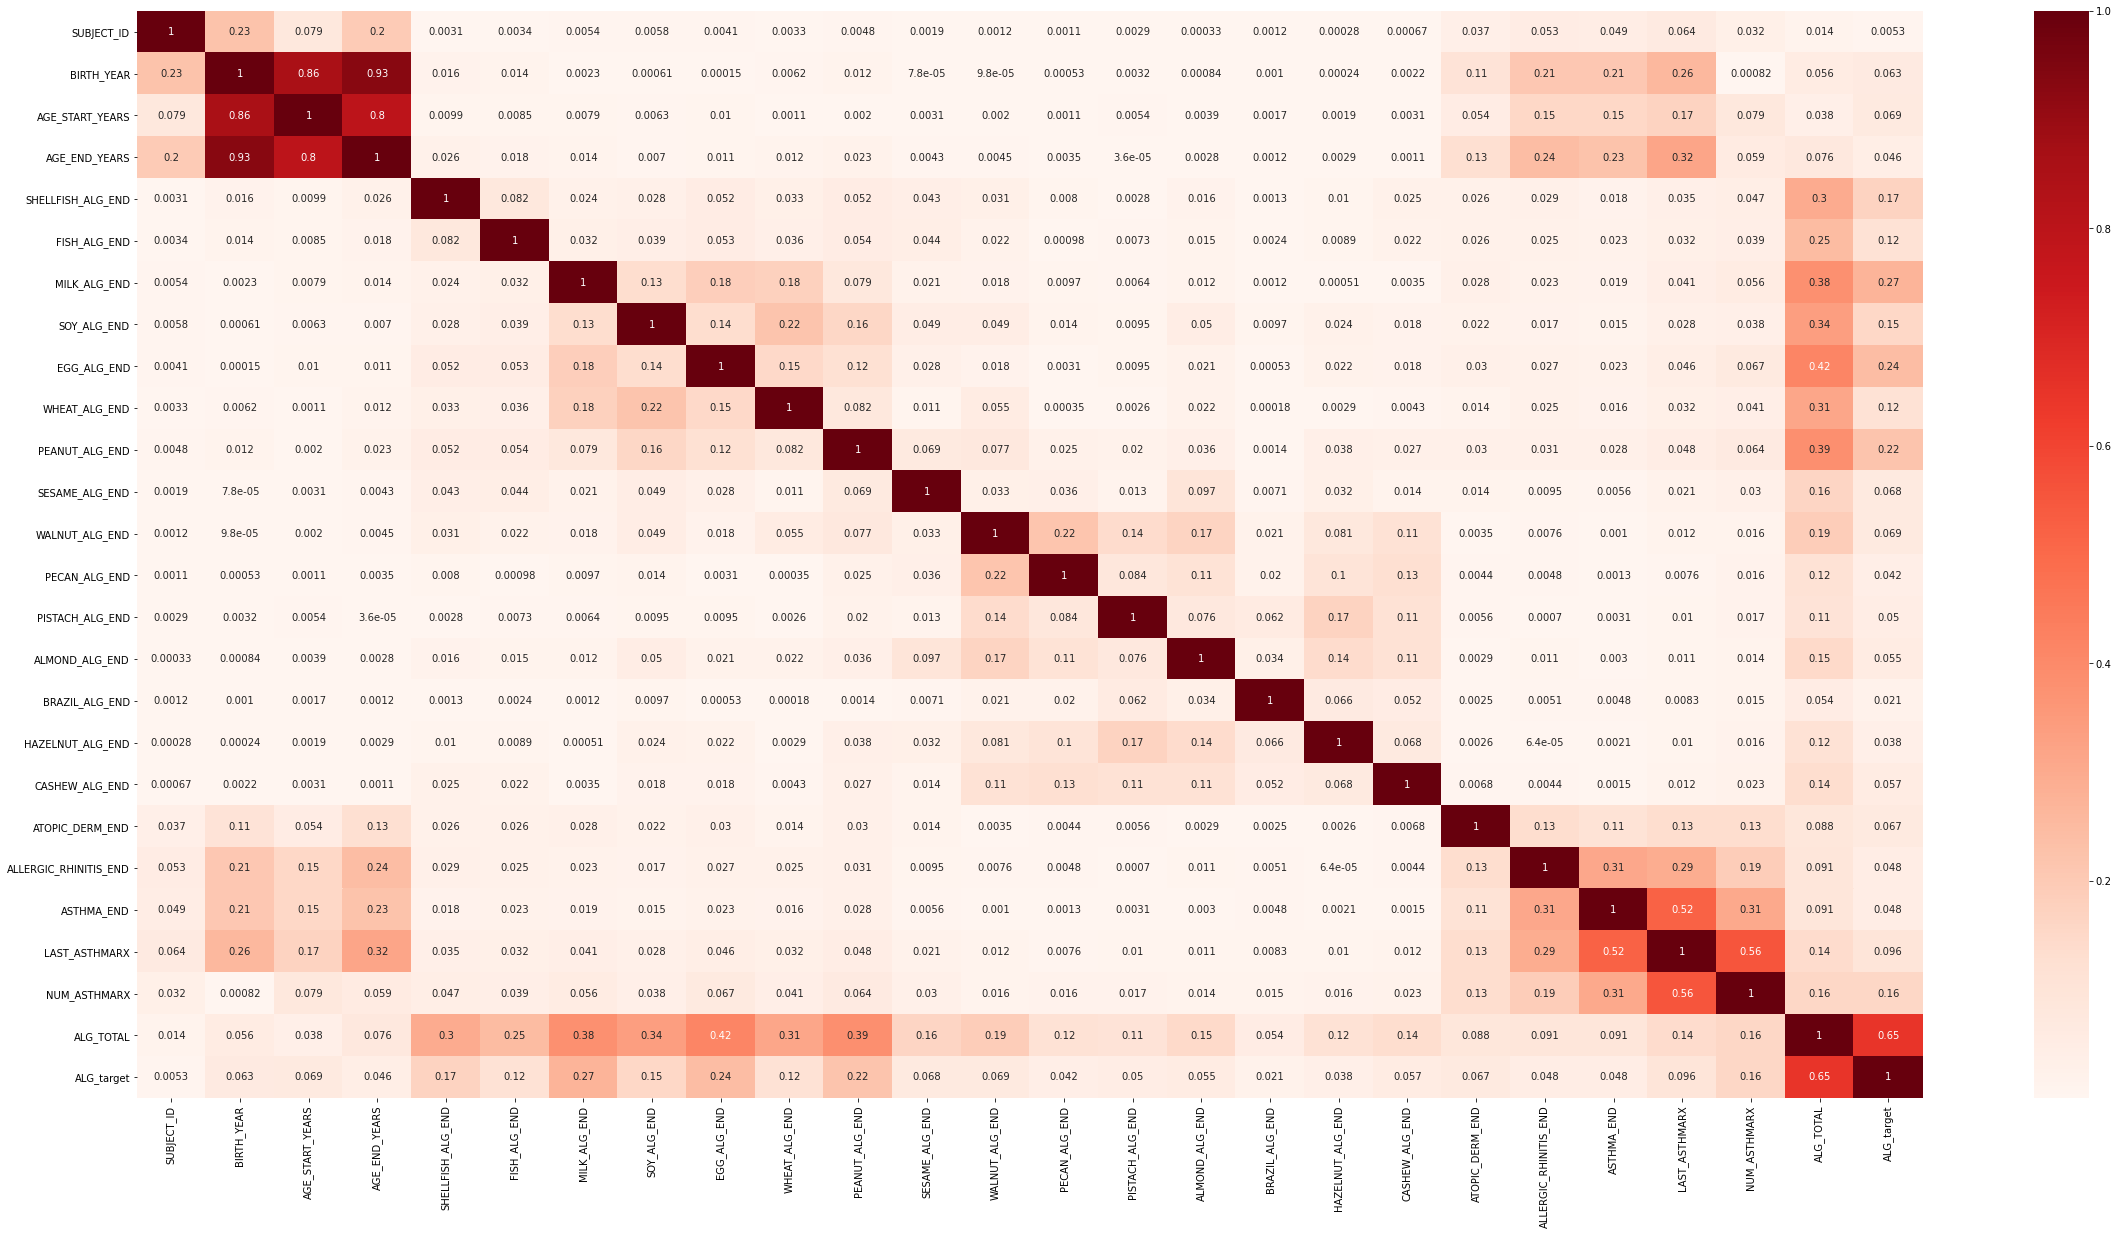

In [15]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(40,20))
sns.heatmap(corr, cmap='Reds', annot=True);

# Modeling

Function that prints out training/test scores for each metric of training and test data and corresponding confusion matrix.

In [19]:
# Credit to Peter Voung
def score_matrix_printer(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Cleaning up scores to be more visually appealing
    ascore_train = round((accuracy_score(y_train, train_pred) * 100), 2)
    pscore_train = round((precision_score(y_train, train_pred) * 100), 2)
    
    ascore_test = round((accuracy_score(y_test, test_pred) * 100), 2)
    pscore_test = round((precision_score(y_test, test_pred) * 100), 2)
    
    conf_mat = plot_confusion_matrix(model, X_test, y_test)
    roc_cirve = plot_roc_curve(model, X_test, y_test)
    
    print(f"""
    Train Accuracy: {ascore_train}%
    Train Precision: {pscore_train}%
    ------------------------------
    Test Accuracy: {ascore_test}%
    Test Precision: {pscore_test}%
    """)

### Split, scaled, transformed and smote

In [18]:
# train test split
y = df['ALG_target']
X = df.drop(['ALG_target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# scale
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# SMOTE data to achieve target variable balance
sm = SMOTE(sampling_strategy='minority', random_state=15)
X_train_scaled, y_train = sm.fit_resample(X_train_scaled, y_train)

In [ ]:
y_train.value_counts()

### Dummy Baseline Model 

Train 0.5
Test 0.06799719887955182


/Users/darla/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



    Train Accuracy: 50.0%
    Train Precision: 0.0%
    ------------------------------
    Test Accuracy: 6.8%
    Test Precision: 0.0%
    


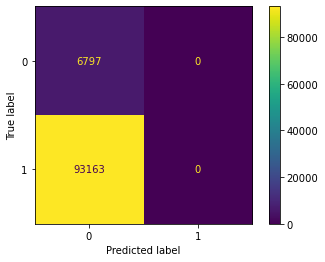

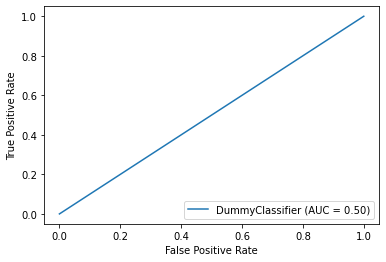

In [20]:
# Instantiated, fit, and ran dummy model

dum = DummyClassifier(strategy="most_frequent")
dum.fit(X_train_scaled, y_train)
y_hat_train = dum.predict(X_train_scaled)
y_hat_test = dum.predict(X_test_scaled)
print(f'Train {accuracy_score(y_train, y_hat_train)}')
print(f'Test {accuracy_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for dummy model
score_matrix_printer(dum, X_train_scaled, y_train, X_test_scaled, y_test)

### One Hot Encoded

In [21]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit_transform(X_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Logistic Regression

/Users/darla/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


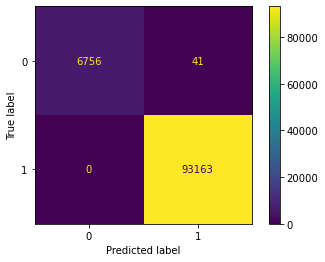

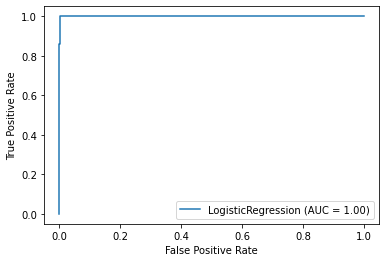

In [31]:
# instatiate logistic model
#fit to training
#score on test

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_hat_train = logreg.predict(X_train_scaled)
y_hat_test = logreg.predict(X_test_scaled)

plot_confusion_matrix(logreg, X_test_scaled, y_test)
plot_roc_curve(logreg, X_test_scaled, y_test);

In [ ]:
score_matrix_printer(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

### Decision Tree Classifier
Finding which allergens have the highest frequencies.

In [24]:
DTC = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
DTC.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

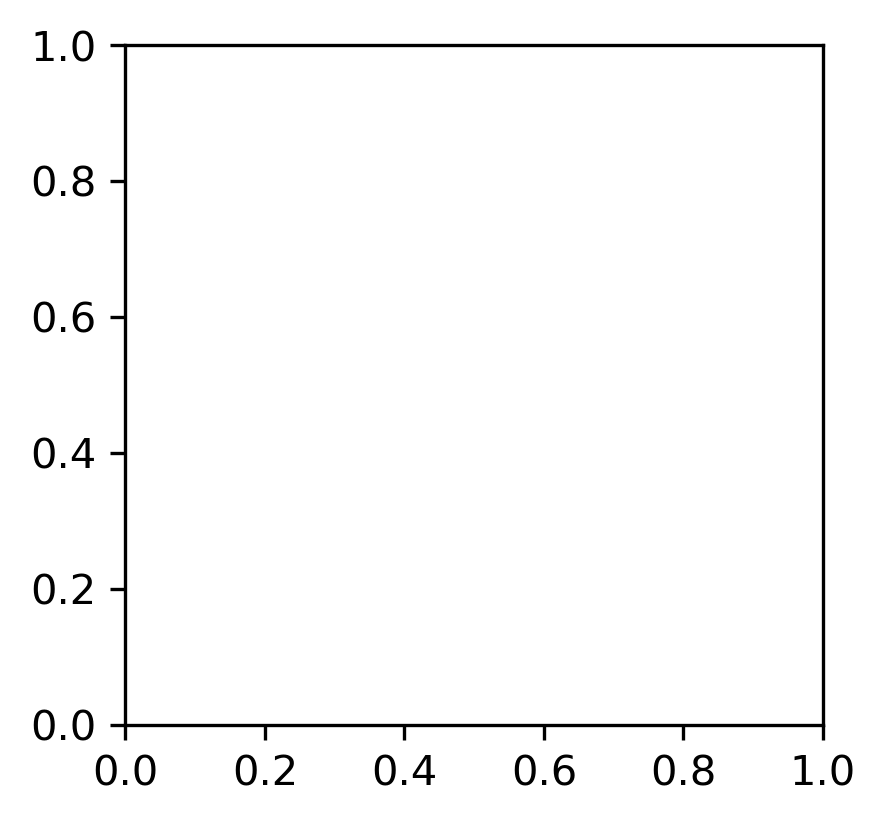

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize = (3,3), dpi=300)
plot_tree(DTC,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

## Evaluation